In [11]:
from datetime import date
from nearestPD import nearestPD
from functions import points2distance, find_centre_region
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt


In [7]:
region = xr.open_dataset("regions_verify_202011.nc")
region

<xarray.Dataset>
Dimensions:             (latitude: 180, longitude: 360)
Coordinates:
  * latitude            (latitude) float64 -89.5 -88.5 -87.5 ... 87.5 88.5 89.5
  * longitude           (longitude) float64 -179.5 -178.5 -177.5 ... 178.5 179.5
Data variables:
    transcom_regions    (latitude, longitude) int32 ...
    regions_bio         (latitude, longitude) int64 ...
    regions_bio_categ   (latitude, longitude) int64 ...
    regions_anth        (latitude, longitude) int64 ...
    regions_anth_categ  (latitude, longitude) int64 ...
Attributes:
    description:  Covariance related parameters for CTDAS-CH4

In [5]:
nhl = list(range(1, 7)) + [15, 16] + list(range(23, 30))
print('NHL 1x1 mTCs: ', nhl)


NHL 1x1 mTCs:  [1, 2, 3, 4, 5, 6, 15, 16, 23, 24, 25, 26, 27, 28, 29]


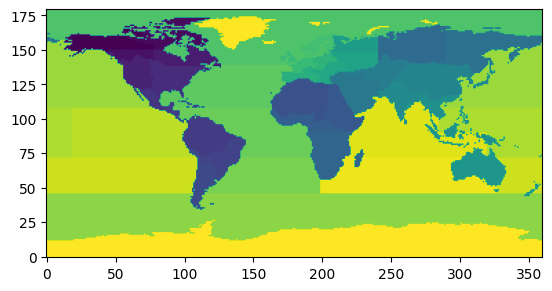

In [16]:
transcom_regions = region.transcom_regions.values

tc = xr.DataArray(transcom_regions)
plt.imshow(tc, origin = "lower")

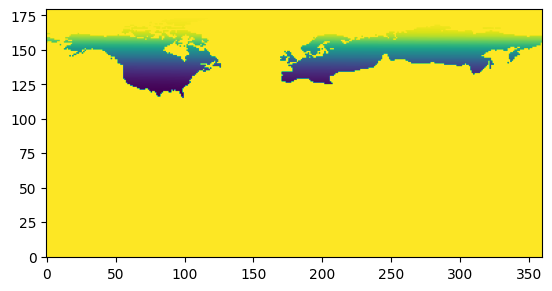

In [17]:
regbio = region.regions_bio.values
bio = xr.DataArray(regbio)
plt.imshow(bio, origin = "lower")

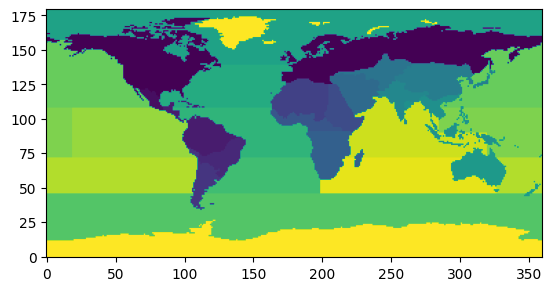

In [20]:
regbio_cat = region.regions_bio_categ.values
bio_cat = xr.DataArray(regbio_cat)
plt.imshow(bio_cat, origin = 'lower')



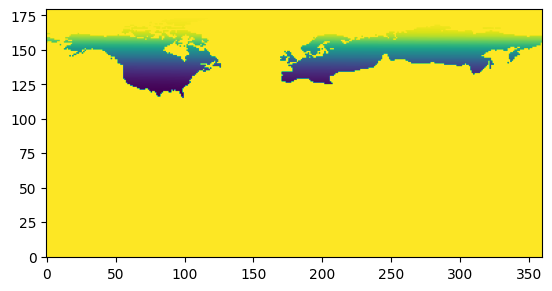

In [23]:
reg_anth = region.regions_anth.values
anth = xr.DataArray(reg_anth)
plt.imshow(anth, origin = 'lower')